In [30]:
import os
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
@dataclass(kw_only=True)
class ShearData:
    name: str
    structured: bool
    distance: np.ndarray
    force: np.ndarray

    def to_df(self) -> pd.DataFrame:
        df = pd.DataFrame({"distance": self.distance,
                           "force": self.force})
        return df
    
    def plot(self, ax, **kwargs):
        with sns.color_palette("deep", 2) as c:
            color = c[0] if self.structured else c[1]
        sns.lineplot(x="distance",
                     y="force",
                     data=self.to_df(),
                     ax=ax,
                     color=color, 
                     label=self.name,
                     **kwargs)
        

In [32]:
def load_file(path: str) -> ShearData:
    df = pd.read_csv(path, sep=";", skiprows=1, decimal=",", header=None)
    distance = np.array(df[0])[:-10]
    force = np.array(df[1])[:-10]
    name = path.split("/")[-1].split(".")[0]
    structured = name[0] == "s"
    data = ShearData(name=name,
                     structured=structured,
                     distance=distance,
                     force=force)
    return data


def get_files(path: str) -> list:
    files = os.listdir(path)
    files = [f for f in files if f.endswith(".txt")]
    return files



In [33]:
path = "../../02_Data/MechanicalTests/CompressiveShear/"
files = get_files(path)
data = []
for file in files:
    this_data = load_file(path + file)
    data.append(this_data)

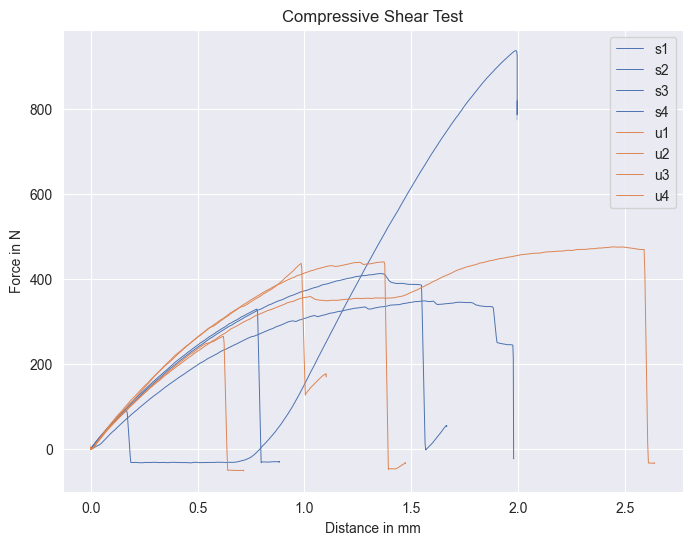

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for measurement in data:
    measurement.plot(ax, linewidth=0.7)
ax.set_xlabel("Distance in mm")
ax.set_ylabel("Force in N")
ax.set_title("Compressive Shear Test")
ax.legend()
plt.savefig(path + "compressive_shear.png", dpi=300)